# Dataset that has User ID, Gender, Age, Salary and Purchased.  

## Purchased is your target variable . 

## Create a model to predict whether a user purchased or did not purchase.   Please gauge these results using a confusion matrix and visualize the results.  

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv("Social_Network_Ads.csv")


In [85]:
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [86]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### No Missing values

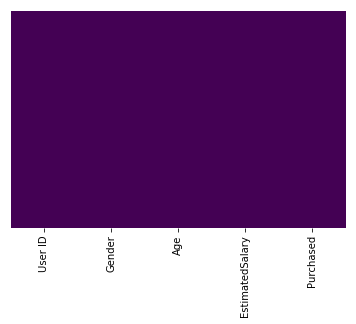

In [87]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### dropping user variable as it is not required

In [88]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [89]:
df.drop("User ID",axis =1,inplace=True)

In [90]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


### converting Gender (M,F) to (1,0)

In [91]:
df['Gender']=np.where(df['Gender'].str.contains("Male"),1,0)
#data[' shares'] = np.where(data[' shares']>=median, 1, 0)


## EDA

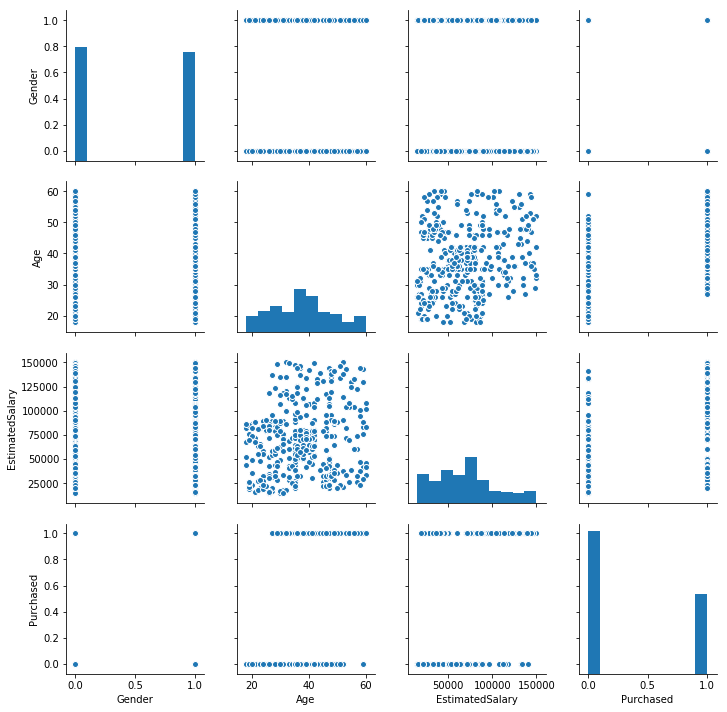

In [92]:
sns.pairplot(df)

In [93]:
cols = df.shape[1]
X = df.iloc[:,:cols-1]#[["Gender","Age","EstimatedSalary"]]

In [94]:
y = df.iloc[:,cols-1:cols]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# SVM

In [96]:
model = svm.SVC()

In [97]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [98]:
print('Train accuracy = {0}%'.format(np.round(model.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(model.score(X_test, y_test) * 100, 2)))
predictions = model.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 98.67%
Test accuracy = 74.0%

 Confusion Matrix: 

[[67  1]
 [25  7]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.73      0.99      0.84        68
          1       0.88      0.22      0.35        32

avg / total       0.78      0.74      0.68       100



## Optimizing Parameters

In [99]:
best_score = 0
for c in [0.1, 1, 10, 100, 1000]:
    for gamma in [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5]:
        
        svc = svm.SVC(C=c, gamma=gamma)

        svc.fit(X_train, y_train) 

        score = svc.score(X_test, y_test)
        if score > best_score:
            finalC = c
            finalGamma = gamma
            best_score = score
            print ("Score:", score, "C= ", c, "gamma = ", gamma)

Score: 0.68 C=  0.1 gamma =  0.0001
Score: 0.7 C=  1 gamma =  0.0001
Score: 0.73 C=  1 gamma =  0.001
Score: 0.82 C=  1 gamma =  0.01


In [100]:
model=svm.SVC(C=1,gamma = 0.01)
model.fit(X_train,y_train)
print('Train accuracy = {0}%'.format(np.round(model.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(model.score(X_test, y_test) * 100, 2)))
predictions = model.predict(X_test)
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Train accuracy = 96.33%
Test accuracy = 82.0%

 Confusion Matrix: 

[[65  3]
 [15 17]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.81      0.96      0.88        68
          1       0.85      0.53      0.65        32

avg / total       0.82      0.82      0.81       100



# Decision Tree

In [101]:
dtree = DecisionTreeClassifier()

In [102]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
predictions = dtree.predict(X_test)
print("Acuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Acuracy on training set: 100.000
Acuracy on test set: 92.000

 Confusion Matrix: 

[[63  5]
 [ 3 29]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.95      0.93      0.94        68
          1       0.85      0.91      0.88        32

avg / total       0.92      0.92      0.92       100



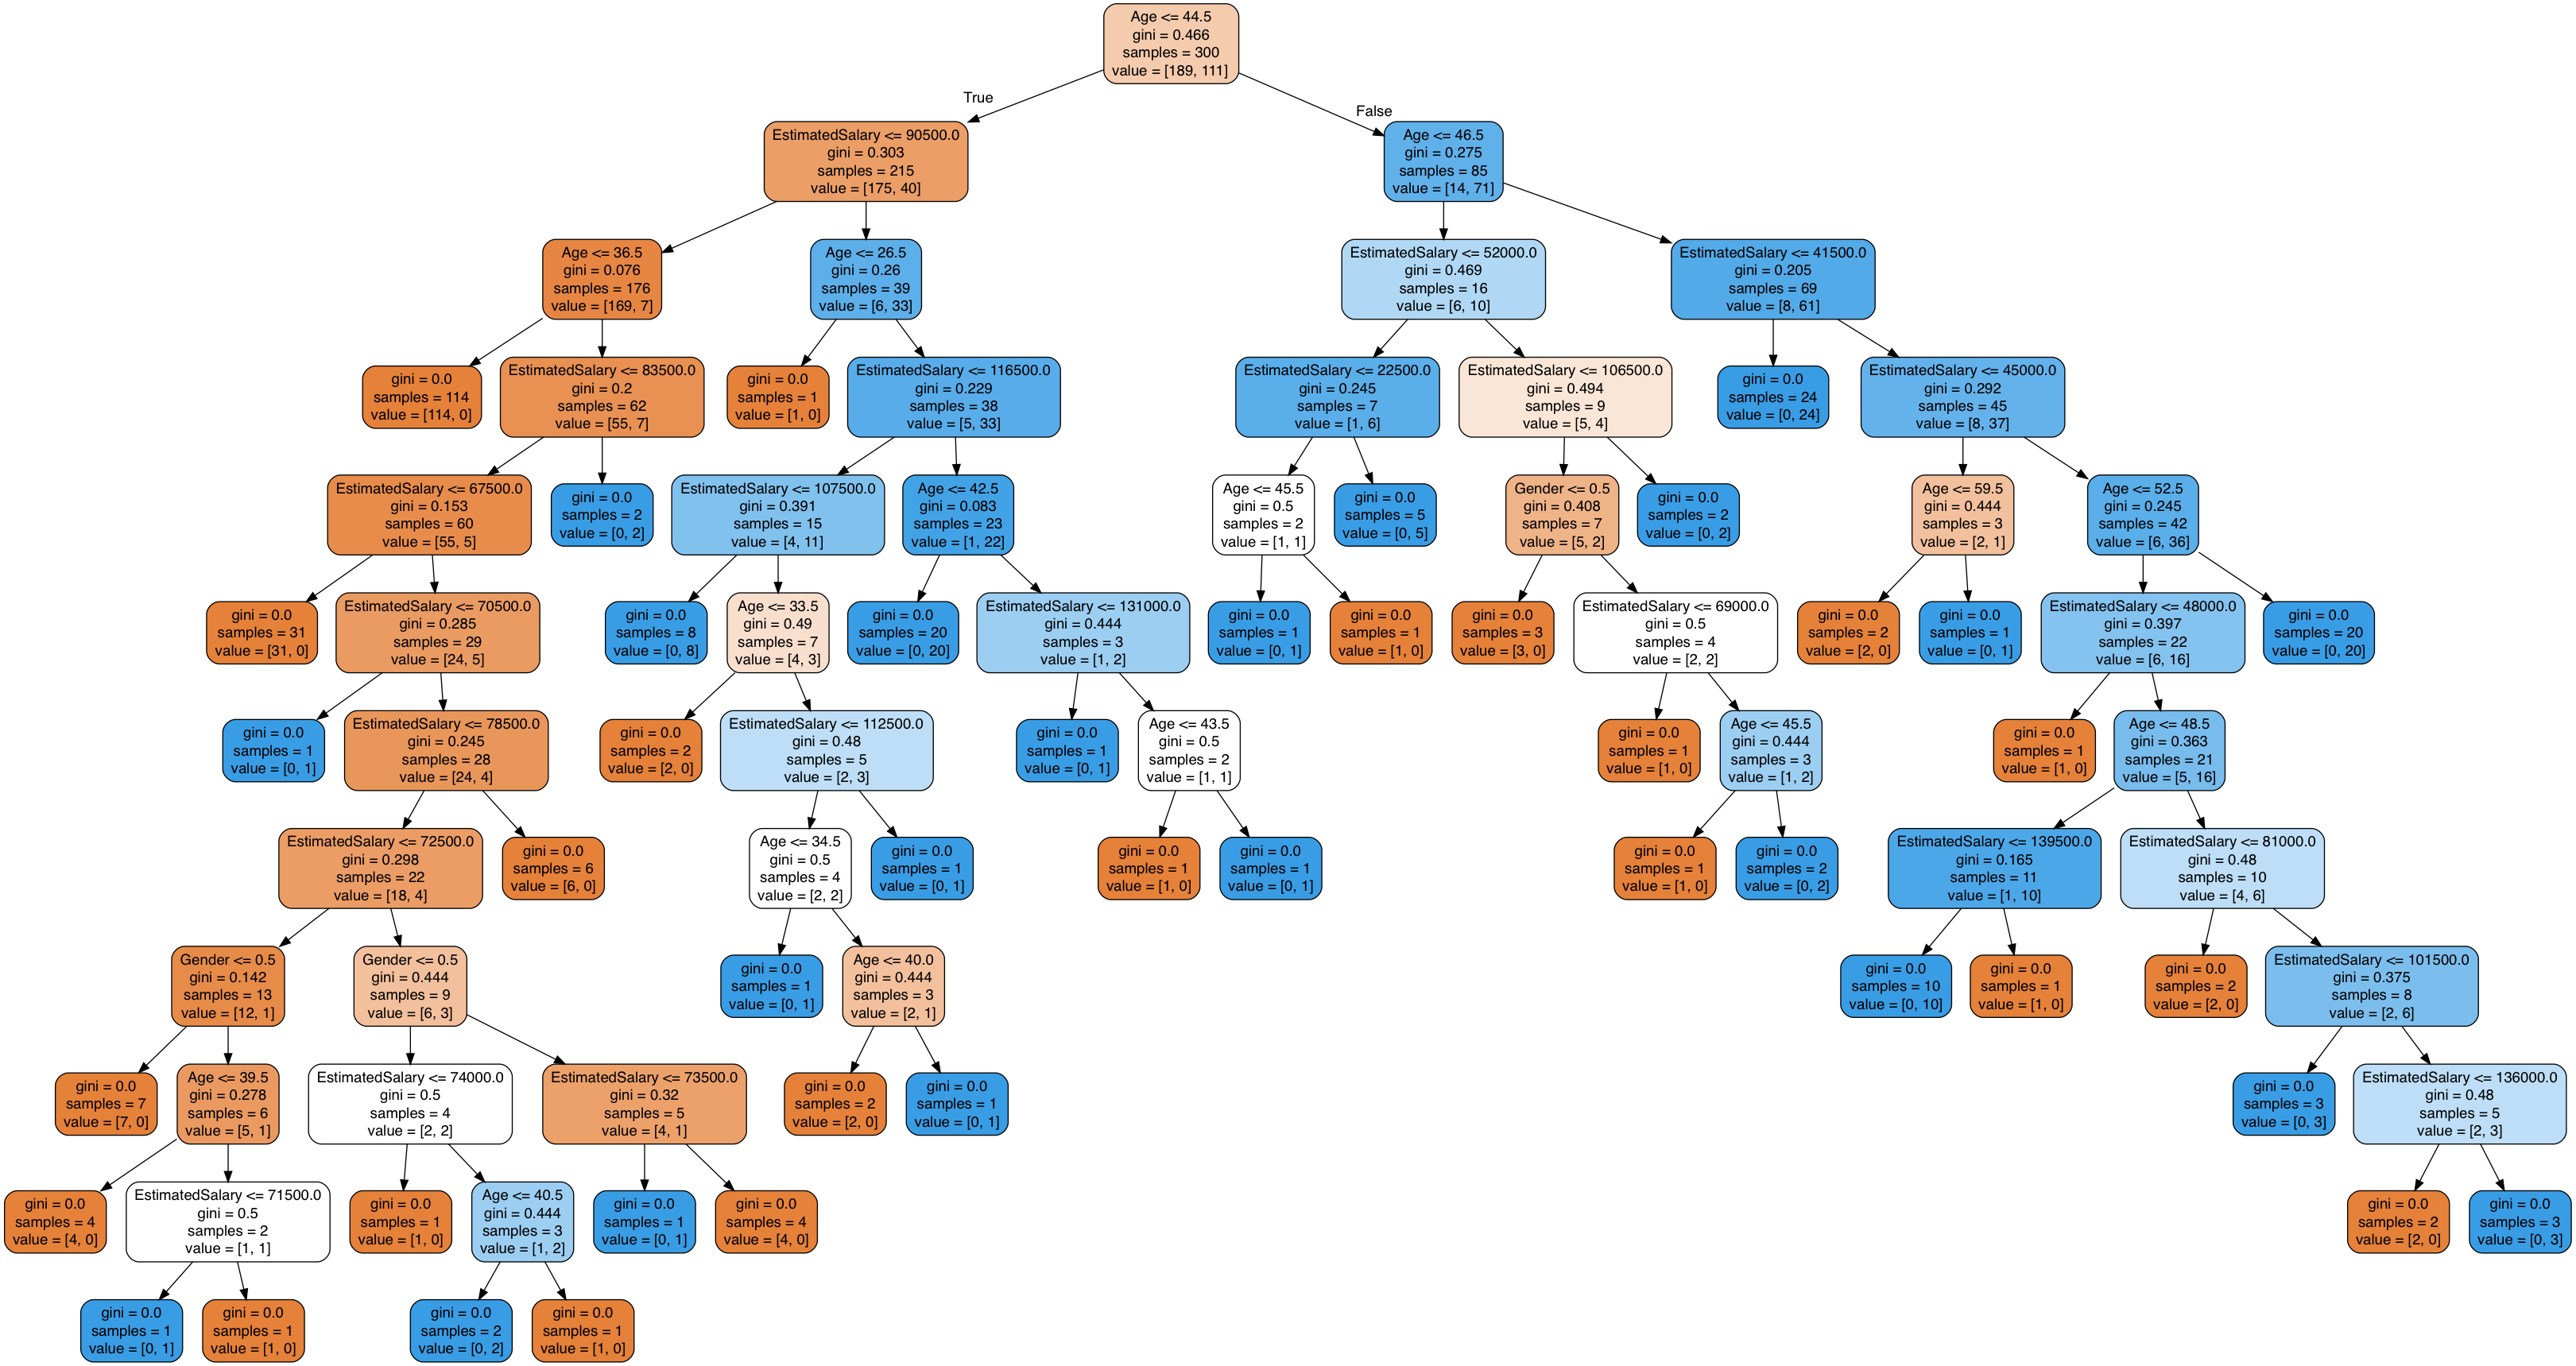

In [104]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
cols=df.shape[1]
features = list(df.columns[:cols-1])
features
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Decision Tree | Accuracy vs Tree depth

In [105]:
accuracy_test=[None]*10
accuracy_train=[None]*10
count=0
for max_depth in range(1,11):
    Decision_tree= DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    Decision_tree.fit(X_train, y_train)
    accuracy_train[count]=Decision_tree.score(X_train, y_train)
    accuracy_test[count]=Decision_tree.score(X_test, y_test)
    count+=1

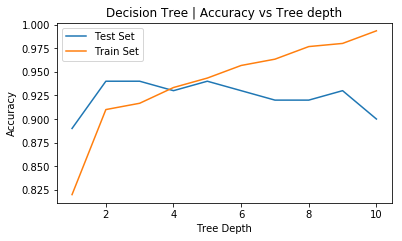

In [106]:
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,11),accuracy_test)
ax1.plot(range(1,11),accuracy_train)


plt.title("Decision Tree | Accuracy vs Tree depth")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])

# Adaboost

In [107]:
dtree = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator=dtree,n_estimators=50)

In [108]:
abc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None)

In [109]:
predictions = abc.predict(X_test)
print("Acuracy on training set: {:.3f}".format(abc.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(abc.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Acuracy on training set: 100.000
Acuracy on test set: 91.000

 Confusion Matrix: 

[[62  6]
 [ 3 29]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.95      0.91      0.93        68
          1       0.83      0.91      0.87        32

avg / total       0.91      0.91      0.91       100



# Random Forest

In [110]:
rfc = RandomForestClassifier(n_estimators=100)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
predictions = rfc.predict(X_test)
print("Acuracy on training set: {:.3f}".format(rfc.score(X_train, y_train)*100))
print("Acuracy on test set: {:.3f}".format(rfc.score(X_test, y_test)*100))
print("\n Confusion Matrix: \n")
print(confusion_matrix(y_test.values, predictions))
print("\n Classification Report: \n")
print(classification_report(y_test.values, predictions))

Acuracy on training set: 100.000
Acuracy on test set: 92.000

 Confusion Matrix: 

[[64  4]
 [ 4 28]]

 Classification Report: 

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        68
          1       0.88      0.88      0.88        32

avg / total       0.92      0.92      0.92       100



# Random Forest | Accuracy vs Tree depth

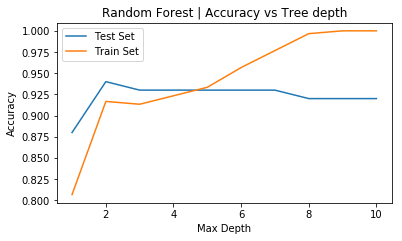

In [113]:
accuracy_test=[None]*10
accuracy_train=[None]*10
count=0
for max_depth in range(1,11):
    rfc= RandomForestClassifier(n_estimators=100,max_depth=max_depth, random_state=0)
    rfc.fit(X_train, y_train)
    accuracy_train[count]=rfc.score(X_train, y_train)
    accuracy_test[count]=rfc.score(X_test, y_test)
    count+=1
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax1.plot(range(1,11),accuracy_test)
ax1.plot(range(1,11),accuracy_train)


plt.title("Random Forest | Accuracy vs Tree depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

plt.legend(['Test Set','Train Set'])